In [40]:
import pandas as pd
http = pd.read_csv('version_4_full.csv')


In [41]:
http.head()

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,Cmdi Word,Cmdi Check,Class
0,GET,/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
1,GET,/favicon.ico,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
2,GET,/index.jsp?content=personal_savings.htm,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
3,GET,/index.jsp?content=personal_deposit.htm,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
4,GET,/index.jsp?content=personal_checking.htm,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good


In [42]:
from pycaret.clustering import *


In [43]:
from pycaret.classification import *

# Assuming http is your pandas DataFrame containing the dataset
classification_setup = setup(data=http,
                              target='Class',  # 'class' is the target variable
                              normalize=True,
                              numeric_features=['Single Quotes', 'Double Quotes', 'Dashes', 'Braces', 'Spaces','Tags','Colons','Backtick', 'Bad Words','XSS Check','XSS Word','Cmdi Word','Cmdi Check'],
                              ignore_features=['Method', 'Path', 'Body'])

compare_models()


,Description,Value
0,Session id,2186
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"Sqli: 0, XSS: 1, cmdi: 2, good: 3"
4,Original data shape,"(2352, 17)"
5,Transformed data shape,"(2352, 14)"
6,Transformed train set shape,"(1646, 14)"
7,Transformed test set shape,"(706, 14)"
8,Ignore features,3
9,Numeric features,13


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9891,0.0000,0.9891,0.9893,0.9891,0.9851,0.9852,0.1600
lightgbm,Light Gradient Boosting Machine,0.9891,0.0000,0.9891,0.9894,0.9891,0.9851,0.9852,1.0040
et,Extra Trees Classifier,0.9879,0.0000,0.9879,0.9882,0.9879,0.9835,0.9836,0.1520
gbc,Gradient Boosting Classifier,0.9866,0.0000,0.9866,0.9871,0.9867,0.9818,0.9820,0.5070
dt,Decision Tree Classifier,0.9854,0.0000,0.9854,0.9861,0.9855,0.9802,0.9804,0.0390
knn,K Neighbors Classifier,0.9708,0.0000,0.9708,0.9719,0.9710,0.9603,0.9606,0.0740
svm,SVM - Linear Kernel,0.9648,0.0000,0.9648,0.9661,0.9645,0.9518,0.9525,0.0480
lr,Logistic Regression,0.9623,0.0000,0.9623,0.9634,0.9621,0.9485,0.9491,0.0560
lda,Linear Discriminant Analysis,0.9119,0.0000,0.9119,0.9206,0.9109,0.8790,0.8824,0.0370
ridge,Ridge Classifier,0.8998,0.0000,0.8998,0.9094,0.8985,0.8620,0.8661,0.0360


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2186, verbose=0,
                       warm_start=False)

In [45]:
lgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9939,0.0000,0.9939,0.9940,0.9939,0.9917,0.9918
1,0.9939,0.0000,0.9939,0.9941,0.9940,0.9918,0.9918
2,0.9879,0.0000,0.9879,0.9885,0.9879,0.9835,0.9837
3,0.9697,0.0000,0.9697,0.9700,0.9695,0.9586,0.9588
4,0.9818,0.0000,0.9818,0.9822,0.9819,0.9752,0.9752
5,0.9879,0.0000,0.9879,0.9885,0.9879,0.9835,0.9837
6,0.9878,0.0000,0.9878,0.9882,0.9877,0.9833,0.9835
7,0.9939,0.0000,0.9939,0.9941,0.9939,0.9917,0.9917
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


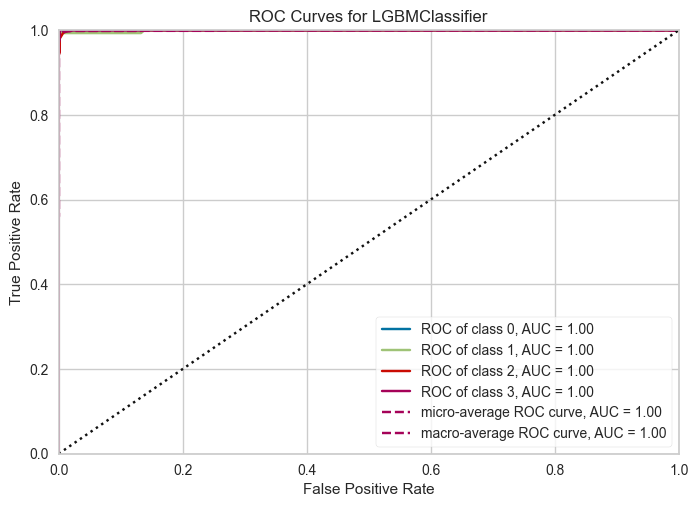

In [46]:
plot_model(lgbm_model)

In [48]:
test = pd.read_csv('testdata.csv')
test.head()

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,Cmdi Word,Cmdi Check
0,GET,/topics/law-school.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GET,/topics/alternative-medicine-degrees.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GET,/topics/law-school-2.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GET,/topics/nursing-continuing-education.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
4,GET,/topics/law-degree.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
test_result = predict_model(lgbm_model,data = test)


In [50]:
test_result

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,Cmdi Word,Cmdi Check,prediction_label,prediction_score
0,GET,/topics/law-school.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
1,GET,/topics/alternative-medicine-degrees.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
2,GET,/topics/law-school-2.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
3,GET,/topics/nursing-continuing-education.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
4,GET,/topics/law-degree.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,GET,/topics/internet-associate-degree.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
97,GET,/topics/online-seminary-degrees.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
98,GET,/topics/associate-online-degree-programs.html,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0
99,GET,/topics/earn-a-degree-online.html,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,good,1.0


In [51]:
test_result.to_csv('testresultfinal.csv', index=False)


In [13]:
evaluate_model(lgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
model1 = finalize_model(lgbm_model)

In [15]:
save_model(model1,'PclBuild')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Single Quotes', 'Double Quotes',
                                              'Dashes', 'Braces', 'Spaces',
                                              'Tags', 'Colons', 'Backtick',
                                              'Bad Words', 'XSS Check',
                                              'XSS Word', 'Cmdi Word',
                                              'Cmdi Check'],...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                     